In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [3]:
train_df = pd.read_csv("../features/train.csv", low_memory=False)
test_df = pd.read_csv("../features/test.csv", low_memory=False)
data = pd.read_csv("data_set.csv", low_memory = False)

In [4]:
train_df = train_df[['id','precio']]
train_df['precio'].value_counts()

1500000.0    3041
2500000.0    3036
1200000.0    2909
3500000.0    2726
1300000.0    2480
             ... 
2704600.0       1
1352250.0       1
938260.0        1
2704460.0       1
2327000.0       1
Name: precio, Length: 15520, dtype: int64

In [5]:
features = pd.merge(train_df, data, on='id', how='inner')
features = features.fillna(0)
features['precio'].value_counts()

1500000.0    3041
2500000.0    3036
1200000.0    2909
3500000.0    2726
1300000.0    2480
             ... 
2704600.0       1
1352250.0       1
938260.0        1
2704460.0       1
2327000.0       1
Name: precio, Length: 15520, dtype: int64

In [6]:
features.not_outlier.value_counts()

1.0    215351
0.0     24649
Name: not_outlier, dtype: int64

In [7]:
filter_name = 'not_outlier'
features = features[features[filter_name] == True]
features.shape
#features.not_outlier.value_counts()

(215351, 181)

In [8]:
labels = features['precio']
features = features.drop(['id','precio'], axis=1)
features.fillna(0, inplace=True)

In [9]:
features.replace([np.inf, -np.inf], np.nan, inplace=True)
features.fillna(0, inplace=True)


In [10]:
from xgboost import XGBRegressor
cv = StratifiedKFold(2)
rfe = RFECV(XGBRegressor(), cv=cv, scoring='neg_mean_squared_error')

rfe = rfe.fit(features, labels)

print(rfe.support_)
print(rfe.ranking_)

C:\Users\G-Tune Robinson\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)


[04:05:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:05:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:06:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:07:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:08:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:08:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:09:32] WARNI

[04:38:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:38:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:39:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:41:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:41:42] WARNI

[05:01:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:02:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:02:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:02:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:56] WARNI

[05:15:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:15:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:15:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:15:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:15:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:15:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:15:57] WARNI

[05:34:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:35:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:37:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:38:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:39:01] WARNI

[06:06:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:07:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:07:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:08:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:08:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:09:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:09:49] WARNI

[06:27:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:28:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:28:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:28:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:29:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:29:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:29:37] WARNI

[06:37:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:37:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:37:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:37:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:37:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:37:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:37:53] WARNI

[07:37:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:38:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:39:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:41:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:42:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:43:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:44:37] WARNI

[08:29:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:30:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:30:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:31:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:32:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:33:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:34:10] WARNI

In [11]:
mask = rfe.get_support() #list of booleans
new_features = [] # The list of your K best features

for bool, feature in zip(mask, features):
    if bool:
        new_features.append(feature)

In [12]:
new_features

['habitaciones',
 'banos',
 'Apartamento',
 'Casa',
 'Casa en condominio',
 'Edificio',
 'Rancho',
 'Terreno',
 'piscina',
 'garages',
 'desc_positiva',
 'desc_seguridad',
 'popular_desc_2',
 'desc_antiguedad',
 'desc_estudio',
 'desc_gym',
 'desc_terminado',
 'desc_pago',
 'desc_oficina',
 'idzona_2',
 'metroscubiertos',
 'metrostotales',
 'metroscubiertos_fillmean',
 'metrostotales_fillmean',
 'antiguedad',
 'days_to_today',
 'qty_of_extras',
 'popular_desc_1',
 'popular_desc_7',
 'popular_desc_13',
 'idzona',
 'lat',
 'Coahuila',
 'Distrito Federal',
 'Durango',
 'Yucatán',
 'habxmetros',
 'habxmetroscub',
 'banosxmetros',
 'banosxmetroscub',
 'banosxhab',
 'precio_ciudad',
 'precio_provincia',
 'precio_idzona']

In [13]:
features = features[new_features]

In [14]:
regressor = XGBRegressor(objective='reg:squarederror', n_estimators=500, learning_rate=0.04,
                             gamma=1, subsample=0.75, colsample_bytree=0.75, max_depth=10)

regressor.fit(features, labels)

C:\Users\G-Tune Robinson\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\G-Tune Robinson\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.75, gamma=1,
             importance_type='gain', learning_rate=0.04, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.75, verbosity=1)

In [29]:

regressor.score(features, labels)



0.9279002087790649

In [15]:
set_test = pd.merge(data, test_df[['id']],on = "id", how = "inner")
ids = set_test["id"]
set_test = set_test.drop(columns=['id'])

In [16]:
set_test = set_test.fillna(0)

In [17]:
set_test = set_test[new_features]

In [18]:
set_test.head()

,habitaciones,banos,Apartamento,Casa,Casa en condominio,Edificio,Rancho,Terreno,piscina,garages,...,Durango,Yucatán,habxmetros,habxmetroscub,banosxmetros,banosxmetroscub,banosxhab,precio_ciudad,precio_provincia,precio_idzona
0,3.0,4.0,0,1,0,0,0,0,0.0,1.706711,...,0,0,0.000000,0.010000,0.000000,0.013333,0.0,4.496526e+06,3.471705e+06,0.000000e+00
1,1.0,1.0,1,0,0,0,0,0,0.0,1.000000,...,0,1,0.014925,0.014925,0.014925,0.014925,1.0,2.028803e+06,2.036020e+06,2.684120e+06
2,2.0,2.0,1,0,0,0,0,0,0.0,1.000000,...,0,0,0.020000,0.022989,0.020000,0.022989,2.0,3.407009e+06,3.471705e+06,2.726905e+06
3,2.0,2.0,1,0,0,0,0,0,0.0,2.000000,...,0,0,0.023256,0.023256,0.023256,0.023256,1.0,2.585813e+06,2.548742e+06,1.465647e+06
4,2.0,1.0,0,1,0,0,0,0,0.0,1.000000,...,0,0,0.026316,0.025000,0.013158,0.012500,2.0,9.147382e+05,2.762465e+06,9.399999e+05


In [19]:
preds_kaggle = regressor.predict(set_test)

In [20]:
df_kaggel = pd.DataFrame(preds_kaggle)
df_kaggel.head()

,0
0,4907977.500
1,1038264.625
2,2260560.500
3,1211919.625
4,713495.625


In [21]:
df_kaggel = pd.DataFrame(df_kaggel)                               
df_kaggel["id"] = ids
df_kaggel.rename(columns = {0: 'target'},inplace = True) 
df_kaggel = df_kaggel[['id','target']]

In [22]:
df_kaggel.head()

,id,target
0,4941,4907977.500
1,51775,1038264.625
2,115253,2260560.500
3,299321,1211919.625
4,173570,713495.625


In [23]:
df_kaggel.to_csv('ResultadosXGBrfe_R.csv',index=False)

In [24]:
df_kaggel.shape

(60000, 2)

In [25]:
df_kaggel.head()

,id,target
0,4941,4907977.500
1,51775,1038264.625
2,115253,2260560.500
3,299321,1211919.625
4,173570,713495.625


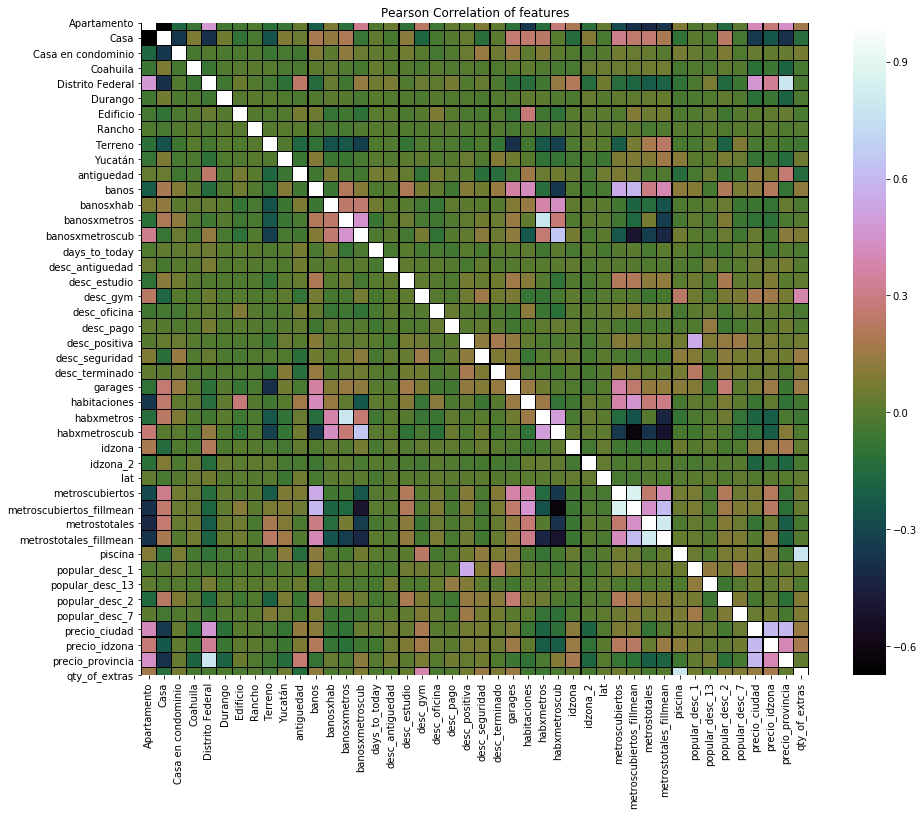

In [32]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in features.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = features.columns.difference(str_list) 
# Create Dataframe containing only numerical features
house_num = features[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(house_num.astype(float).corr(),linewidths=0.15,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=False)

In [35]:
features.columns

Index(['habitaciones', 'banos', 'Apartamento', 'Casa', 'Casa en condominio',
       'Edificio', 'Rancho', 'Terreno', 'piscina', 'garages', 'desc_positiva',
       'desc_seguridad', 'popular_desc_2', 'desc_antiguedad', 'desc_estudio',
       'desc_gym', 'desc_terminado', 'desc_pago', 'desc_oficina', 'idzona_2',
       'metroscubiertos', 'metrostotales', 'metroscubiertos_fillmean',
       'metrostotales_fillmean', 'antiguedad', 'days_to_today',
       'qty_of_extras', 'popular_desc_1', 'popular_desc_7', 'popular_desc_13',
       'idzona', 'lat', 'Coahuila', 'Distrito Federal', 'Durango', 'Yucatán',
       'habxmetros', 'habxmetroscub', 'banosxmetros', 'banosxmetroscub',
       'banosxhab', 'precio_ciudad', 'precio_provincia', 'precio_idzona'],
      dtype='object')

In [39]:
regressor.feature_importances_

array([0.00580706, 0.05016613, 0.04064572, 0.03189201, 0.0077078 ,
       0.04297358, 0.01932076, 0.03293058, 0.00562719, 0.01150982,
       0.00370262, 0.00477782, 0.00883902, 0.01144629, 0.00349577,
       0.01606629, 0.00888608, 0.01246362, 0.0056349 , 0.00606756,
       0.02697694, 0.00899727, 0.19096433, 0.01362779, 0.00993909,
       0.01102527, 0.00848209, 0.00502057, 0.00567634, 0.01617037,
       0.00994718, 0.00582508, 0.00942238, 0.05482688, 0.00836918,
       0.01827411, 0.01075331, 0.01594226, 0.00608586, 0.00729693,
       0.00940036, 0.04784011, 0.01896416, 0.15021148], dtype=float32)

AttributeError: Coefficients are not defined for Booster type gbtree

In [42]:
mask = rfe.get_support() #list of booleans
new_features = [] # The list of your K best features

for bool, feature in zip(mask, features):
    if bool:
        new_features.append(feature)

In [46]:
features_rank = rfe.ranking_
#print(features_rank)

rank = features_rank[mask]

In [58]:
new_features

['habitaciones',
 'banos',
 'Apartamento',
 'Casa en condominio',
 'Edificio',
 'desc_positiva',
 'metroscubiertos_fillmean',
 'metrostotales_fillmean',
 'popular_desc_13',
 'idzona',
 'habxmetroscub',
 'precio_ciudad']

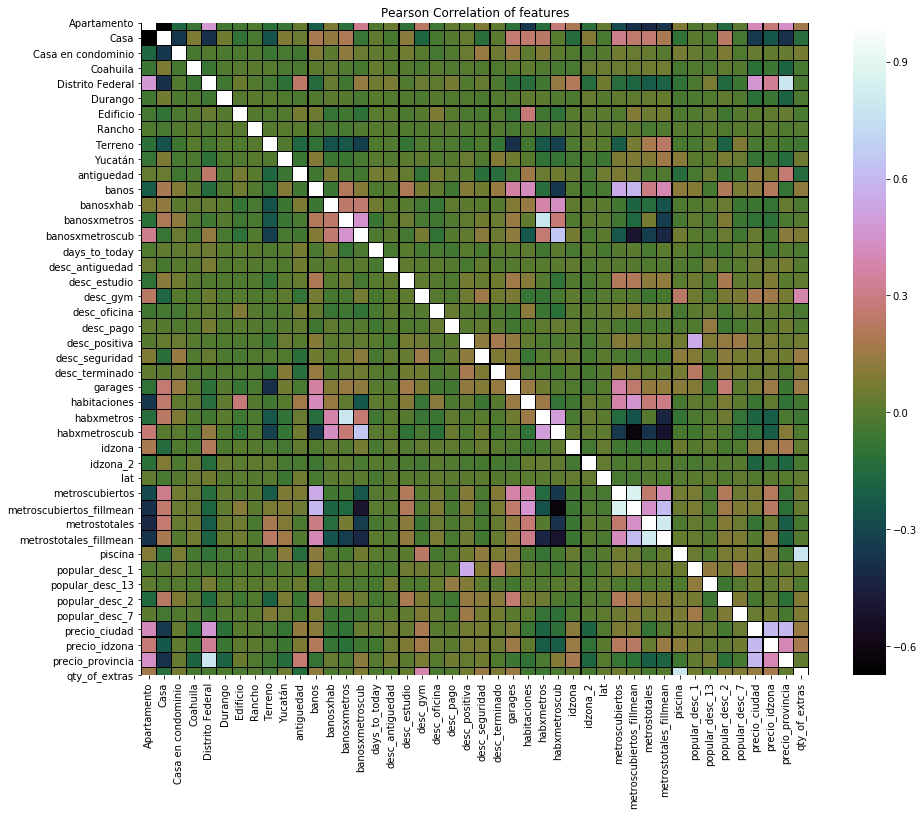

In [59]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in features.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = features.columns.difference(str_list) 
# Create Dataframe containing only numerical features
house_num = features[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(house_num.astype(float).corr(),linewidths=0.15,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=False)

Index(['Apartamento', 'Casa', 'Casa en condominio', 'Coahuila',
       'Distrito Federal', 'Durango', 'Edificio', 'Rancho', 'Terreno',
       'Yucatán', 'antiguedad', 'banos', 'banosxhab', 'banosxmetros',
       'banosxmetroscub', 'days_to_today', 'desc_antiguedad', 'desc_estudio',
       'desc_gym', 'desc_oficina', 'desc_pago', 'desc_positiva',
       'desc_seguridad', 'desc_terminado', 'garages', 'habitaciones',
       'habxmetros', 'habxmetroscub', 'idzona', 'idzona_2', 'lat',
       'metroscubiertos', 'metroscubiertos_fillmean', 'metrostotales',
       'metrostotales_fillmean', 'piscina', 'popular_desc_1',
       'popular_desc_13', 'popular_desc_2', 'popular_desc_7', 'precio_ciudad',
       'precio_idzona', 'precio_provincia', 'qty_of_extras'],
      dtype='object')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

['Apartamento',
 'Casa en condominio',
 'Edificio',
 'banos',
 'desc_positiva',
 'habitaciones',
 'habxmetroscub',
 'idzona',
 'metroscubiertos_fillmean',
 'metrostotales_fillmean',
 'popular_desc_13',
 'precio_ciudad']

['habitaciones',
 'banos',
 'Apartamento',
 'Casa en condominio',
 'Edificio',
 'desc_positiva',
 'metroscubiertos_fillmean',
 'metrostotales_fillmean',
 'popular_desc_13',
 'idzona',
 'habxmetroscub',
 'precio_ciudad']

In [68]:
new_features  = ['habitaciones',
 'banos',
 'Apartamento',
 'Casa',
 'Casa en condominio',
 'Edificio',
 'Rancho',
 'Terreno',
 'piscina',
 'garages',
 'desc_positiva',
 'desc_seguridad',
 'popular_desc_2',
 'desc_antiguedad',
 'desc_estudio',
 'desc_gym',
 'desc_terminado',
 'desc_pago',
 'desc_oficina',
 'idzona_2',
 'metroscubiertos',
 'metrostotales',
 'metroscubiertos_fillmean',
 'metrostotales_fillmean',
 'antiguedad',
 'days_to_today',
 'qty_of_extras',
 'popular_desc_1',
 'popular_desc_7',
 'popular_desc_13',
 'idzona',
 'lat',
 'Coahuila',
 'Distrito Federal',
 'Durango',
 'Yucatán',
 'habxmetros',
 'habxmetroscub',
 'banosxmetros',
 'banosxmetroscub',
 'banosxhab',
 'precio_ciudad',
 'precio_provincia',
 'precio_idzona']

In [70]:
feature_importances = regressor.feature_importances_


In [78]:
fe_df = pd.DataFrame(columns=['features','importance'])
for i in range(44):
    fe_df.loc[i]=[new_features[i],feature_importances[i]]

In [87]:
fe_df.nlargest(10,columns='importance')

,features,importance
22,metroscubiertos_fillmean,0.190964
43,precio_idzona,0.150211
33,Distrito Federal,0.054827
1,banos,0.050166
41,precio_ciudad,0.047840
5,Edificio,0.042974
2,Apartamento,0.040646
7,Terreno,0.032931
3,Casa,0.031892
20,metroscubiertos,0.026977


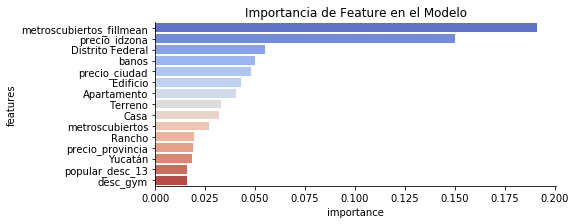

In [116]:
g = sns.factorplot(x="importance", y="features", data = fe_df.nlargest(15,columns='importance'), kind="bar", 
               size=3, aspect=2.7, palette='coolwarm')
plt.title('Importancia de Feature en el Modelo')
g.savefig('output.png')

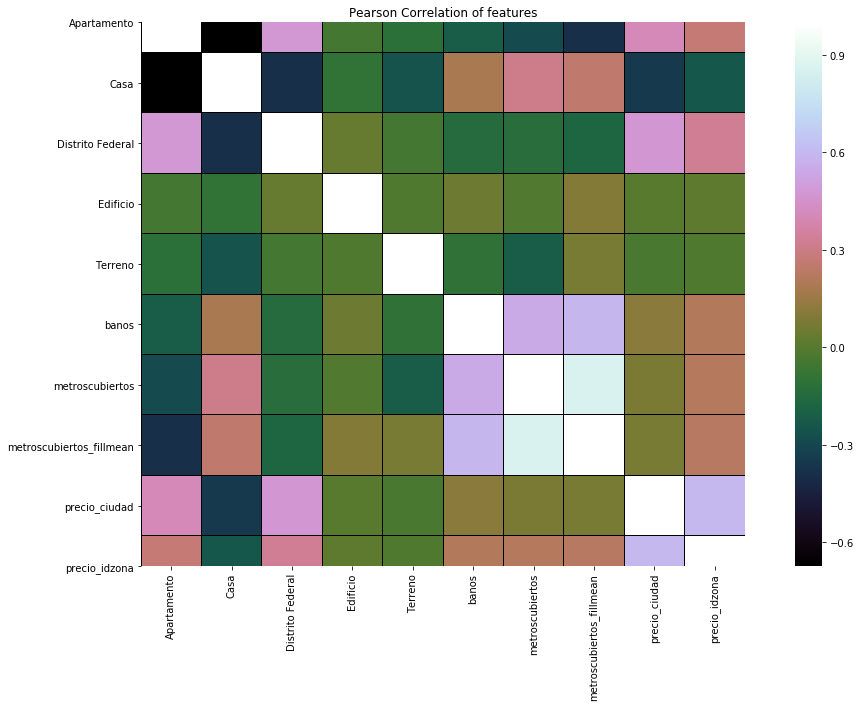

In [144]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in fe_df.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = df_to_rank.columns.difference(str_list) 
# Create Dataframe containing only numerical features
house_num = df_to_rank[num_list]
f, ax = plt.subplots(figsize=(18, 10))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
g = sns.heatmap(house_num.astype(float).corr(),linewidths=0.15,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=False)
fig = g.get_figure()
fig.savefig("output.png")



In [125]:
features[num_list]

,Apartamento,Casa,Casa en condominio,Coahuila,Distrito Federal,Durango,Edificio,Rancho,Terreno,Yucatán,...,metrostotales_fillmean,piscina,popular_desc_1,popular_desc_13,popular_desc_2,popular_desc_7,precio_ciudad,precio_idzona,precio_provincia,qty_of_extras
0,1,0,0,0,1,0,0,0,0,0,...,80.000000,0.0,0,0,0,0,3.384659e+06,3.036895e+06,3.471705e+06,0.0
1,0,0,1,0,1,0,0,0,0,0,...,180.000000,0.0,1,0,1,0,4.605869e+06,3.430078e+06,3.471705e+06,0.0
2,0,1,0,0,0,0,0,0,0,0,...,166.000000,0.0,0,0,1,1,8.870115e+05,1.040921e+06,2.367694e+06,0.0
3,0,1,0,0,0,0,0,0,0,0,...,67.000000,0.0,0,0,0,0,1.472305e+06,1.545000e+06,2.762465e+06,0.0
4,1,0,0,0,0,0,0,0,0,0,...,95.000000,0.0,1,0,0,1,2.749675e+06,1.938494e+06,2.367694e+06,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,0,1,0,0,0,0,0,0,0,0,...,183.794681,0.0,0,0,1,0,1.472305e+06,1.545000e+06,2.762465e+06,0.0
239996,0,1,0,0,0,0,0,0,0,0,...,250.000000,0.0,0,0,1,0,1.449309e+06,1.720913e+06,2.762465e+06,0.0
239997,1,0,0,0,1,0,0,0,0,0,...,138.000000,0.0,1,0,1,0,3.384659e+06,4.090639e+06,3.471705e+06,0.0
239998,0,1,0,0,1,0,0,0,0,0,...,137.000000,0.0,0,0,0,0,1.699366e+06,4.288857e+06,3.471705e+06,1.0


In [134]:
to_rank = list(fe_df.nlargest(10,columns='importance').features)

In [135]:
df_to_rank = features[to_rank]
df_to_rank 

,metroscubiertos_fillmean,precio_idzona,Distrito Federal,banos,precio_ciudad,Edificio,Apartamento,Terreno,Casa,metroscubiertos
0,80.0,3.036895e+06,1,2.0,3.384659e+06,0,1,0,0,80.0
1,268.0,3.430078e+06,1,2.0,4.605869e+06,0,0,0,0,268.0
2,144.0,1.040921e+06,0,2.0,8.870115e+05,0,0,0,1,144.0
3,63.0,1.545000e+06,0,1.0,1.472305e+06,0,0,0,1,63.0
4,95.0,1.938494e+06,0,1.0,2.749675e+06,0,1,0,0,95.0
...,...,...,...,...,...,...,...,...,...,...
239995,67.0,1.545000e+06,0,1.0,1.472305e+06,0,0,0,1,67.0
239996,200.0,1.720913e+06,0,3.0,1.449309e+06,0,0,0,1,200.0
239997,138.0,4.090639e+06,1,2.0,3.384659e+06,0,1,0,0,138.0
239998,235.0,4.288857e+06,1,4.0,1.699366e+06,0,0,0,1,235.0
